<a href="https://colab.research.google.com/github/addo561/learning-pytorch/blob/main/ComputerVisionI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import numpy as np
from copy import deepcopy
x = np.array([[1,1]])
y = np.array([[0]])

In [224]:
x.shape

(1, 2)

In [225]:
W= [
np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]
W[0].shape,W[1].shape,W[2].shape #[input,hidden]->[hidden]->[hidden,output]

((2, 3), (3,), (3, 1))

In [226]:
class ActivationFunctions:

  @staticmethod
  def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

  @staticmethod
  def relu(x):
    return np.where(x>0,x,0)

  @staticmethod
  def linear(x):
    return x

  @staticmethod
  def  sigmoid(x):
    return 1/(1+np.exp(-x))

  @staticmethod
  def softmax(x):
    return np.exp(x)/ np.sum(np.exp(x))


In [227]:
Ac = ActivationFunctions
Ac.relu(3)

array(3)

In [228]:
class Loss_functions:

  @staticmethod
  def mse(p,y): #mean square error
    return np.mean(np.square(p-y))

  @staticmethod
  def mae(p,y):#mean absolute error
    return np.mean(np.abs(p-y))

  @staticmethod
  def binary_cross_entropy(p,y):
    return -np.mean(y*np.log(p)+(1-y)*np.log(1-p))

  @staticmethod
  def categorical_cross_entropy(p,y):
    return -np.mean(np.log(p[np.arange(len(y)),y]))

In [229]:
class FirstNN:
  def __init__(self,epoches,lr,x,y,W) :
    self.epoches  = epoches
    self.lr,self.x,self.y,self.W = lr,x,y,W
    self.losses = []

  def feed_forward(self,inputs,outputs,weights):
    pre_hidden = np.dot(inputs,weights[0])+weights[1]
    hidden = ActivationFunctions.sigmoid(pre_hidden)
    pred_out = np.dot(hidden,weights[2])+weights[3]
    mse = Loss_functions.mse(pred_out,outputs)
    return mse

  #with no chain rule

  def update_weights(self,inputs,outputs,weights,lr):
      original_weights = deepcopy(weights)
      temp_weights = deepcopy(weights)
      updated_weights = deepcopy(weights)

      #loss
      original_loss = self.feed_forward(inputs,outputs,original_weights)
      for i,layer in enumerate(original_weights):
        for index,weight in np.ndenumerate(layer):
              temp_weights = deepcopy(weights)
              temp_weights[i][index] += 0.0001
              loss_plus = self.feed_forward(inputs,outputs,temp_weights)
              grad  = (loss_plus-original_loss)/(0.0001)
              updated_weights[i][index] -= grad*lr
      return updated_weights,original_loss

  def train(self):
    for epoch in range(self.epoches):
      self.W,loss  = self.update_weights(self.x,self.y,self.W,self.lr)
      self.losses.append(loss.item())

In [230]:
NN = FirstNN(100,0.01,x,y,W)

In [231]:
NN.train()

In [232]:
loss = NN.losses
loss[:5]

[0.33455008989960927,
 0.31207511631926566,
 0.2911120956789758,
 0.2715584285618008,
 0.25331865368289397]

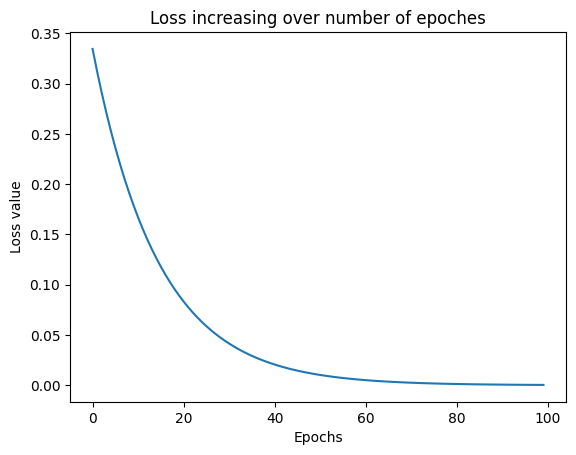

In [233]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.title('Loss increasing over number of epoches')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.show()

In [234]:
NN.W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

In [235]:
#UNDERSTANDING LEARNING  RATES
X,Y = np.array([[1],[2],[3],[4]]),np.array([[3],[6],[9],[12]])
def feed_forwardlr(inputs,outputs,weights):
  pred  = np.dot(inputs,weights[0])+weights[1]
  mse  = Loss_functions.mse(pred,outputs)
  return mse

def update_weightslr(inputs,outputs,weights,lr):
  original_weights = deepcopy(weights)
  updated_w  = deepcopy(weights)
  original_loss = feed_forwardlr(inputs,outputs,original_weights)

  for i,layer in enumerate(original_weights):
    for index,weight in np.ndenumerate(layer):
      temp_weights = deepcopy(weights)
      temp_weights[i][index] += 0.0001
      loss_plus  =  feed_forwardlr(inputs,outputs,temp_weights)
      grad = (loss_plus-original_loss)/(0.0001)
      updated_w  [i][index] -= grad*lr
      if (i%2==0):
        print(f'W_val: {np.round(original_weights[i][index],2)},original_loss: {np.round(original_loss,2)},loss_plus: {np.round(loss_plus,2)},gradient: {np.round(grad,2)},updated_w: {np.round(updated_w[i][index])}')
  return updated_w ,original_loss

In [236]:
W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

In [237]:
def train(lr):
  weight_val = []
  loss  = []
  global W
  for ep in  range(10):
    W ,l  =  update_weightslr(X,Y,W,lr)#try  diff  values
    weight_val.append(W[0][0][0].item())
    loss.append(l.item())
  return weight_val,loss ,lr

In [238]:
w,l,lr = train(0.01)

W_val: 0.0,original_loss: 67.5,loss_plus: 67.5,gradient: -45.0,updated_w: 0.0
W_val: 0.44999998807907104,original_loss: 46.88,loss_plus: 46.88,gradient: -37.49,updated_w: 1.0
W_val: 0.8199999928474426,original_loss: 32.57,loss_plus: 32.57,gradient: -31.26,updated_w: 1.0
W_val: 1.1399999856948853,original_loss: 22.64,loss_plus: 22.64,gradient: -26.05,updated_w: 1.0
W_val: 1.399999976158142,original_loss: 15.75,loss_plus: 15.75,gradient: -21.72,updated_w: 2.0
W_val: 1.6200000047683716,original_loss: 10.97,loss_plus: 10.97,gradient: -18.1,updated_w: 2.0
W_val: 1.7999999523162842,original_loss: 7.65,loss_plus: 7.65,gradient: -15.09,updated_w: 2.0
W_val: 1.9500000476837158,original_loss: 5.35,loss_plus: 5.35,gradient: -12.59,updated_w: 2.0
W_val: 2.069999933242798,original_loss: 3.75,loss_plus: 3.75,gradient: -10.49,updated_w: 2.0
W_val: 2.180000066757202,original_loss: 2.64,loss_plus: 2.64,gradient: -8.75,updated_w: 2.0


In [239]:
def  plot(weight_val,loss,lr):
  fig,axs = plt.subplots(1,2)
  axs[0].plot(weight_val)
  # Use set_ylabel to set the y-label on the Axes object
  axs[0].set_ylabel('W')
  # Use set_xlabel to set the x-label on the Axes object
  axs[0].set_xlabel('epochs')
  # Use set_title to set the title on the Axes object
  axs[0].set_title(f'weight values with lr={lr}')
  axs[1].plot(loss)
  axs[1].set_xlabel('epochs')
  axs[1].set_ylabel('loss')
  axs[1].set_title(f'loss curve for {lr}')

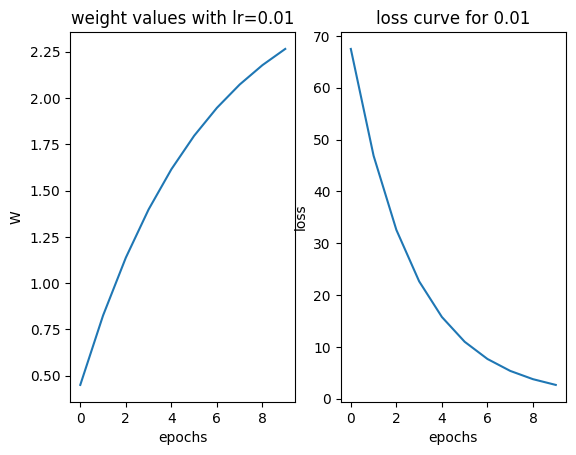

In [240]:
plot(w,l,lr)

In [241]:
w,l,lr  = train(0.1)

W_val: 2.2699999809265137,original_loss: 1.88,loss_plus: 1.87,gradient: -7.31,updated_w: 3.0
W_val: 3.0,original_loss: 0.9,loss_plus: 0.9,gradient: 4.74,updated_w: 3.0
W_val: 2.5199999809265137,original_loss: 0.46,loss_plus: 0.46,gradient: -3.31,updated_w: 3.0
W_val: 2.8499999046325684,original_loss: 0.27,loss_plus: 0.27,gradient: 2.07,updated_w: 3.0
W_val: 2.6500000953674316,original_loss: 0.17,loss_plus: 0.17,gradient: -1.52,updated_w: 3.0
W_val: 2.799999952316284,original_loss: 0.13,loss_plus: 0.13,gradient: 0.89,updated_w: 3.0
W_val: 2.7100000381469727,original_loss: 0.11,loss_plus: 0.11,gradient: -0.72,updated_w: 3.0
W_val: 2.7799999713897705,original_loss: 0.09,loss_plus: 0.09,gradient: 0.36,updated_w: 3.0
W_val: 2.75,original_loss: 0.08,loss_plus: 0.08,gradient: -0.36,updated_w: 3.0
W_val: 2.7799999713897705,original_loss: 0.08,loss_plus: 0.08,gradient: 0.12,updated_w: 3.0


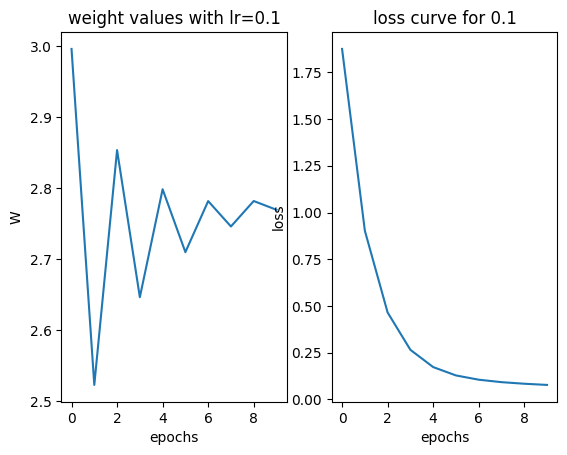

In [242]:
plot(w,l,lr)

In [243]:
w,l,lr = train(1)

W_val: 2.7699999809265137,original_loss: 0.07,loss_plus: 0.07,gradient: -0.2,updated_w: 3.0
W_val: 2.9600000381469727,original_loss: 0.17,loss_plus: 0.17,gradient: 1.97,updated_w: 1.0
W_val: 0.9900000095367432,original_loss: 33.6,loss_plus: 33.6,gradient: -31.75,updated_w: 33.0
W_val: 32.7400016784668,original_loss: 8280.75,loss_plus: 8280.8,gradient: 493.81,updated_w: -461.0
W_val: -461.07000732421875,original_loss: 2010183.59,loss_plus: 2010182.88,gradient: -7102.19,updated_w: 6641.0
W_val: 6641.1201171875,original_loss: 425824170.66,loss_plus: 425824170.66,gradient: 0.0,updated_w: 6641.0
W_val: 6641.1201171875,original_loss: 425824170.66,loss_plus: 425824170.66,gradient: 0.0,updated_w: 6641.0
W_val: 6641.1201171875,original_loss: 425824170.66,loss_plus: 425824170.66,gradient: 0.0,updated_w: 6641.0
W_val: 6641.1201171875,original_loss: 425824170.66,loss_plus: 425824170.66,gradient: 0.0,updated_w: 6641.0
W_val: 6641.1201171875,original_loss: 425824170.66,loss_plus: 425824170.66,gradie

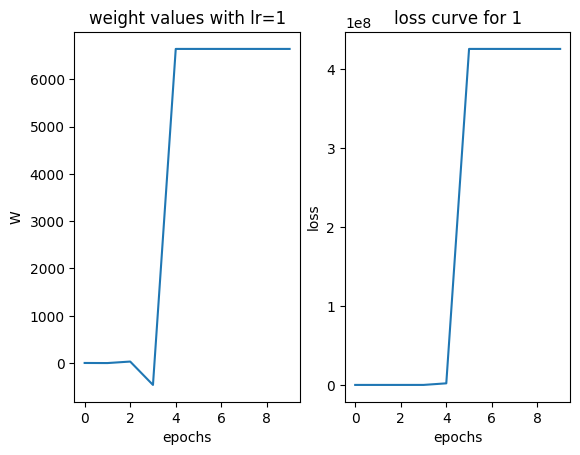

In [244]:
plot(w,l,lr)